## Online Transaction Data Analysis and Visulization

### Context

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [814]:
# Intall packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style


#### 1. Import data

In [753]:
data = pd.read_csv('online_retail.csv')

#### 2. Data Profilling and Cleaning

In [754]:
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [755]:
data.info() # There are null values in "Description" and "CustomerID" column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [756]:
# Drop rows with null values from 'CustomerID' and 'Description'
data = data.dropna(subset=['CustomerID', 'Description'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


In [757]:
# Statistical summary for numerical variables
data.describe()

,index,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,278048.159318,12.061303,3.460471,15287.690570
std,152744.019884,248.693370,69.315162,1713.600303
min,0.000000,-80995.000000,0.000000,12346.000000
25%,147749.000000,2.000000,1.250000,13953.000000
50%,284435.000000,5.000000,1.950000,15152.000000
75%,409528.000000,12.000000,3.750000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [758]:
# Change the datatype of "InvoiceDate" column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [759]:
# Find duplicates based on 'InvoiceNo', 'StockCode' and 'InvoiceDate'

duplicates = data.duplicated(subset=['InvoiceNo', 'StockCode', 'InvoiceDate'], keep=False)
duplicate_rows = data[duplicates]
duplicate_rows

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
125,125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
483,483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
485,485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541692,541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [760]:
# remove other duplicates while keeping the first record
cleaned_data = data.drop_duplicates(subset=['InvoiceNo', 'StockCode'], keep='first')
cleaned_data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [762]:
# Create a new metric "Sales" to calculate sales
cleaned_data['Sales'] = cleaned_data['Quantity']*cleaned_data['UnitPrice']

/var/folders/g1/8p70rjqd3211xkcrmp_jzvv40000gn/T/ipykernel_74659/2379486698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sales'] = cleaned_data['Quantity']*cleaned_data['UnitPrice']


In [763]:
# Format the 'InvoiceDate' column to 'YYYY-MM' format and store in a new 'InvoiceMonth' column
cleaned_data['InvoiceMonth'] = cleaned_data['InvoiceDate'].dt.strftime('%Y-%m')
cleaned_data['InvoiceMonth']

/var/folders/g1/8p70rjqd3211xkcrmp_jzvv40000gn/T/ipykernel_74659/405265695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['InvoiceMonth'] = cleaned_data['InvoiceDate'].dt.strftime('%Y-%m')


0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: InvoiceMonth, Length: 396681, dtype: object

In [764]:
# Calculate the total sales for each month
MonthlySales = cleaned_data.groupby('InvoiceMonth')['Sales'].sum().reset_index()
MonthlySales

,InvoiceMonth,Sales
0,2010-12,549221.670
1,2011-01,471759.320
2,2011-02,434349.710
3,2011-03,577202.550
4,2011-04,424244.941
5,2011-05,645595.120
6,2011-06,603754.760
7,2011-07,571861.511
8,2011-08,613392.900
9,2011-09,926573.471


In [765]:
# Convert 'Sales' from currency unit to millions
MonthlySales['Sales'] = MonthlySales['Sales'] / 1e6

In [766]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396681 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         396681 non-null  int64         
 1   InvoiceNo     396681 non-null  object        
 2   StockCode     396681 non-null  object        
 3   Description   396681 non-null  object        
 4   Quantity      396681 non-null  int64         
 5   InvoiceDate   396681 non-null  datetime64[ns]
 6   UnitPrice     396681 non-null  float64       
 7   CustomerID    396681 non-null  float64       
 8   Country       396681 non-null  object        
 9   Sales         396681 non-null  float64       
 10  InvoiceMonth  396681 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 36.3+ MB


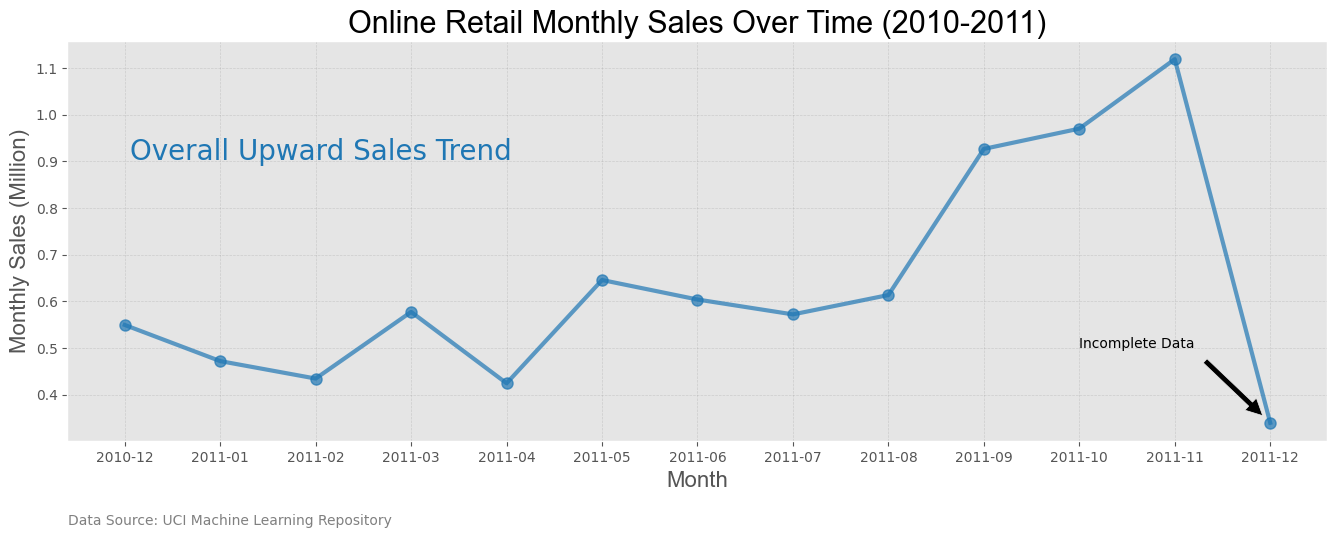

In [816]:
# Set the style for nicer aesthetics
style.use('ggplot')

# Create a figure and an axes
fig, ax = plt.subplots(figsize =(18, 8)) 

x = MonthlySales['InvoiceMonth']
y = MonthlySales['Sales']

# Define fonts
font1 = {'family':'Arial','size':16}
font2 = {'family':'Arial','size':22}

# Set the background color of the figure
# fig.set_facecolor('whitesmoke')

# Set the background color of the axes
# ax.set_facecolor('whitesmoke')

# adjust the location of plot
plt.subplots_adjust(left=0.25, right=0.95, top=0.8, bottom=0.3)


# Plot the data
ax.plot(x,
        y,
        marker = 'o',
        markersize = 8,
        color = 'tab:blue',
        linewidth = 3,
        alpha = 0.7
        ) # Add markers, line style, and color

# Set the title and labels
ax.set_title('Online Retail Monthly Sales Over Time (2010-2011)', fontdict=font2)
ax.set_xlabel('Month', fontdict=font1)
ax.set_ylabel('Monthly Sales (Million)', fontdict=font1)

# Annotate the last point
ax.annotate('Incomplete Data', # The text of the annotation
            color = 'black',
            xy=('2011-12', 0.33948201), # The point (x,y) to annotate
            xytext=(10, 0.5), # The position (x,y) to place the text at, relative to the point
            arrowprops=dict(facecolor='black',  shrink=0.1)) # Properties for the arrow

# Add a description in the plot
ax.text(0.05, 
        0.95, 
        'Overall Upward Sales Trend', 
        fontsize=20,
        color = 'tab:blue',
        va='top',  # vertical alignment
        ha='left') # horizontal alignment

# Add a description at the bottom of the plot
fig.text(0.34,
         0.2,
         'Data Source: UCI Machine Learning Repository',
         ha='center', # horizontal alignment
         va='center',
         color = 'grey') # vertical alignment

# Add grid
ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray', alpha = 0.25)

plt.show()